# 1. Install and import required packages

In [ ]:
!pip install biopython
!pip install scikit-learn-extra
!pip install pyclustering

     |████████████████████████████████| 2.3MB 2.8MB/s 
     |████████████████████████████████| 624kB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=342093 sha256=c589e292e13f2d771015bc221a6d7f540333b13863a540b20d68ea3f259c8a5c
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra
     |████████████████████████████████| 2.6MB 2.8MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.9.3.1-cp36-none-any.whl size=2599356 sha256=229e40aa144e3e1fa4d9fdb1301460c78d2f1a671dc860380360e12c7dbfd68a
  Stored in directory: /root/.cache/pip/wheels/34/d6/ac/59746c226a35752edcd786d3ab96f9b547a2b70d0fbda92015
Successfully built pyclustering


In [ ]:
from Bio import AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw
from Bio import SeqIO
from Bio import Phylo, AlignIO
import subprocess
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import itertools
from Bio.Align.Applications import ClustalOmegaCommandline
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize

# 2. Import Multiple Sequence Alignment

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 Human sequences

In [ ]:
alignment_human = AlignIO.read("/content/drive/My Drive/Colab Notebooks/DSLS/week10/input/alignment_human_sequences.fasta", "fasta")
print(alignment_human)

SingleLetterAlphabet() alignment with 14 rows and 29903 columns
--------------------------------------ACTTTC...--- gb|MT451640.1
------------TACCCTCCCAGGTAACAAACCAACCAACTTTC...--- gb|MT499220.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...--- gb|MT434808.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...--- gb|MT434809.1
-------------------------------------AACTTTC...--- gb|MT447176.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA gb|MT350282.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA gb|MT470177.1
--------------------------------------------...--- gb|MT407659.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA gb|MT358639.1
--TAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA gb|MT531537.2
--------------CCTTCCCAGGTAACAAACCAACCAACTTTC...--- gb|MT259229.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA gb|MT466071.1
-----------ATACCTTCCCAGGTAACAAACCAACCAACTTTC...--- gb|MT632947.1
-------------ACCTTCCCAGGTAACAAACCAACCAACTTTC...--- gb|MT633004.1


## 2.2 Sequences from different hosts

In [ ]:
alignment_different_hosts = AlignIO.read("/content/drive/My Drive/Colab Notebooks/DSLS/week10/input/alignment_different_hosts.fasta", "fasta")
print(alignment_different_hosts)

SingleLetterAlphabet() alignment with 7 rows and 33063 columns
--------------------------------------------...--- KX389094
--------------------------------------------...--- JQ065048
--------------------------------------------...--- NC_019843
--------------------------------------------...--- MN996528
--------------------------------------------...AAA MG772934
AGAAACAAGTAGTGTTTTAAAAACCTTCAAATTAGTGCCTGTAA...--- NC_034972
--------------------------------------------...--- MT084071


# 3. Distance calculation

In [ ]:
calculator = DistanceCalculator('identity')

## 3.1 Human sequences

In [ ]:
dm_human = calculator.get_distance(alignment_human)
print(dm_human)

gb|MT451640.1	0
gb|MT499220.1	0.0063873189980938605	0
gb|MT434808.1	0.007256796976891966	0.002374343711333271	0
gb|MT434809.1	0.007256796976891966	0.002374343711333271	0.00013376584289204185	0
gb|MT447176.1	0.006052904390863811	0.0029428485436243657	0.00207337056482626	0.0020064876433802947	0
gb|MT350282.1	0.008059392034244106	0.003310704611577453	0.00127077550747412	0.0012038925860281546	0.0026084339363943165	0
gb|MT470177.1	0.00782530180918306	0.0030766143865164075	0.0010366852824131856	0.0010366852824131856	0.0025749924756713893	0.00036785606795308734	0
gb|MT407659.1	0.006019462930140773	0.002976290004347404	0.00224057786844134	0.00224057786844134	0.0010366852824131856	0.0030431729257933693	0.002809082700732324	0
gb|MT358639.1	0.00782530180918306	0.0030766143865164075	0.0010366852824131856	0.0010366852824131856	0.0026418753971173548	0.00043473898939905276	0.00020064876433800727	0.0026084339363943165	0
gb|MT531537.2	0.007791860348460022	0.0030431729257933693	0.0011370096645821892	0.0

## 3.2 Sequences from different hosts

In [ ]:
dm_different_hosts = calculator.get_distance(alignment_different_hosts)
print(dm_different_hosts)

KX389094	0
JQ065048	0.4881287239512446	0
NC_019843	0.584853159120467	0.6193025436288297	0
MN996528	0.5639839095060944	0.6044218612951033	0.489610743126758	0
MG772934	0.5663127967819013	0.6074161449354263	0.4941475365211868	0.11414572180382909	0
NC_034972	0.6187581284214984	0.6322777727368962	0.5997943320327859	0.5639536642167982	0.5639839095060944	0
MT084071	0.586274687717388	0.6130720140338142	0.5378822248434807	0.21610259202129267	0.24084323866557789	0.502827934549194	0
	KX389094	JQ065048	NC_019843	MN996528	MG772934	NC_034972	MT084071


# 4. Create the Phylogenetic Tree using

# 4.1 UPGMA

In [ ]:
constructor = DistanceTreeConstructor()

# 4.1.1 Human sequences

In [ ]:
metadata_human = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DSLS/week10/input/metadata_human_sequences.csv")
metadata_human

,accession number,host,location,collection date
0,MT466071,Homo Sapiens,Uruguay,2020-03-13
1,MT499220,Homo sapiens,Tunisia,2020-03-31
2,MT447176,Homo sapiens,Thailand,2020-03-20
3,MT531537,Homo sapiens,Italy,2020-03-01
4,MT470177,Homo sapiens,France,2020-03-15
5,MT358639,Homo sapiens,Germany,2020-02-20
6,MT259229,Homo sapiens,"China: Hubei, Wuhan",2020-01-26
7,MT350282,Homo sapiens,Brazil,2020-03-18
8,MT407659,Homo sapiens,China: Zhejiang,2020-03-24
9,MT451640,Homo sapiens,Australia,2020-03-25


In [ ]:
codes_human = []
names_human = []

for index, row in metadata_human.iterrows():
    if row['accession number'] != 'MT531537':
      new_code = 'gb|' + row['accession number'] + '.1'
    else:
      new_code = 'gb|' + row['accession number'] + '.2'
    new_name = '   ' + row['accession number'] + ' | ' + row['location'] + ' | ' + row['collection date']
    codes_human.append(new_code)
    names_human.append(new_name)

In [ ]:
print(codes_human)

['gb|MT466071.1', 'gb|MT499220.1', 'gb|MT447176.1', 'gb|MT531537.2', 'gb|MT470177.1', 'gb|MT358639.1', 'gb|MT259229.1', 'gb|MT350282.1', 'gb|MT407659.1', 'gb|MT451640.1', 'gb|MT434809.1', 'gb|MT434808.1', 'gb|MT633004.1', 'gb|MT632947.1']


In [ ]:
print(names_human)

['   MT466071 | Uruguay | 2020-03-13', '   MT499220 | Tunisia | 2020-03-31', '   MT447176 | Thailand | 2020-03-20', '   MT531537 | Italy | 2020-03-01', '   MT470177 | France | 2020-03-15', '   MT358639 | Germany | 2020-02-20', '   MT259229 | China: Hubei, Wuhan | 2020-01-26', '   MT350282 | Brazil | 2020-03-18', '   MT407659 | China: Zhejiang | 2020-03-24', '   MT451640 | Australia | 2020-03-25', '   MT434809 | USA: NY | 2020-03-19', '   MT434808 | USA: NY | 2020-03-19', '   MT633004 | USA: Washington | 2020-03-23', '   MT632947 | USA: Washington | 2020-03-23']


In [ ]:
def get_label_human(leaf):    
    if leaf.name.startswith('Inner'):
        name=''
        return name
    else:  
        for i in range(0, len(codes_human)):
            if leaf.name==codes_human[i]:
                name=names_human[i]
                return name

In [ ]:
tree_human = constructor.upgma(dm_human) 

In [ ]:
#color branches for continents
tree_human.root.color = "blue"
tree_human.clade[0,0,0].color = "red"
tree_human.clade[0,0,1,0].color = "blue"
tree_human.clade[0,0,1,0,1].color = "red"
tree_human.clade[0,0,1,1].color = "green"
tree_human.clade[0,0,1,1,0,1].color = "pink"
tree_human.clade[0,0,1,1,1].color = "blue"
tree_human.clade[1].color = "purple"
tree_human.clade[0,1].color = "brown"

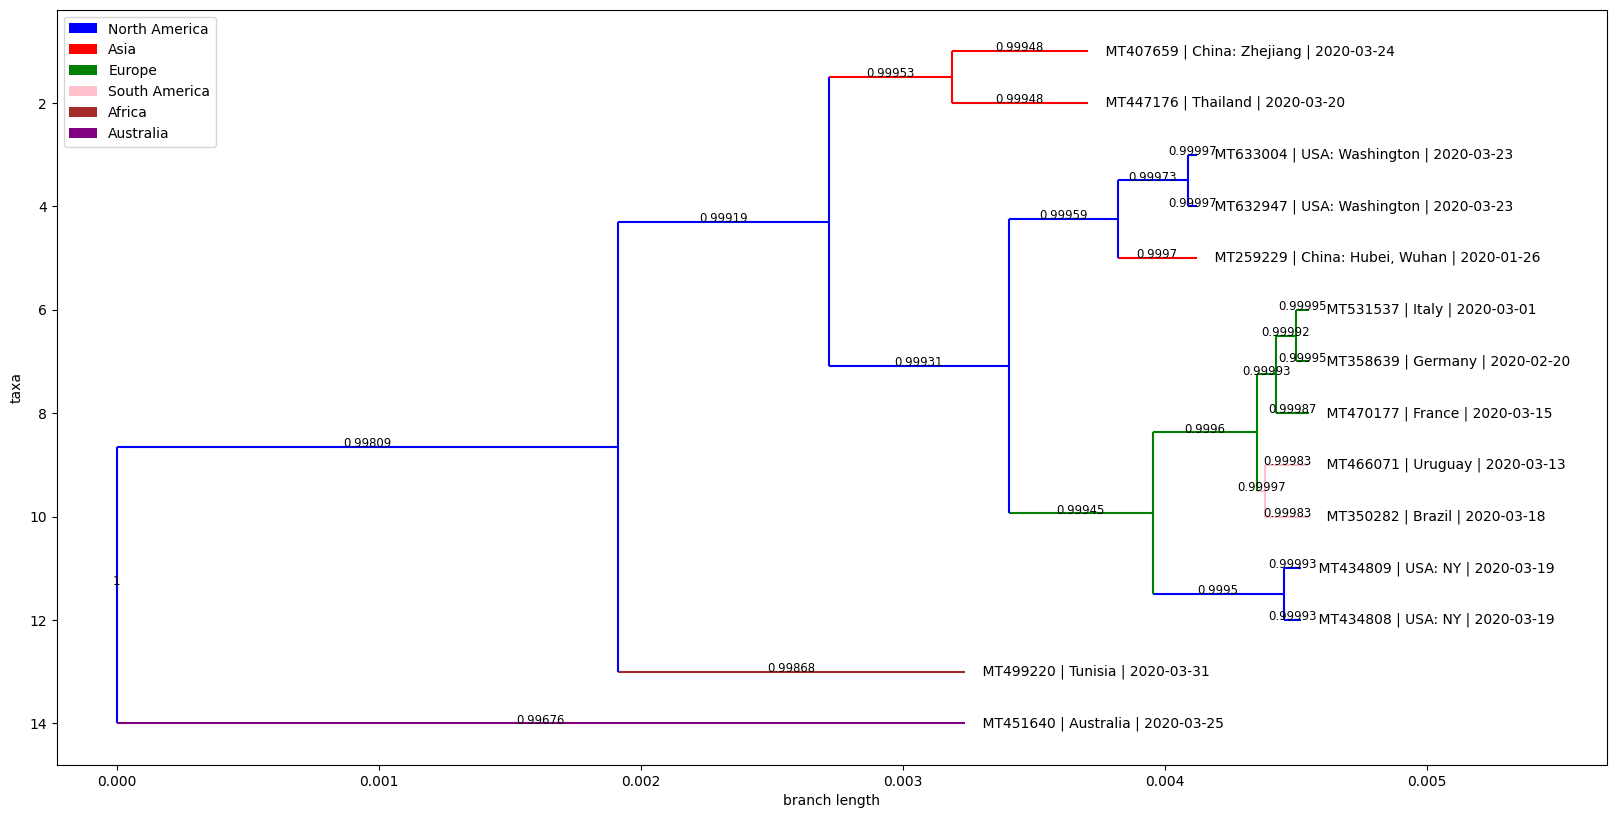

In [ ]:
tree_human.rooted = True
fig = plt.figure(figsize=(20, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
legend_elements = (Patch(facecolor='blue', label='North America'), Patch(facecolor='red', label='Asia'), Patch(facecolor='green', label='Europe'), Patch(facecolor='pink', label='South America'), Patch(facecolor='brown', label='Africa'), Patch(facecolor='purple', label='Australia'))
axes.legend(handles=legend_elements, loc='upper left')
Phylo.draw(tree_human, axes=axes, label_func=get_label_human, branch_labels=lambda c: round(1-c.branch_length, 5), do_show=False)
#plt.savefig("/content/drive/My Drive/Colab Notebooks/DSLS/week10/output/phylogenetic_tree_human_sequences.png")

# 4.1.2 Sequences from different hosts

In [ ]:
def get_label_different_hosts(leaf):
    code=['JQ065048', 'MN996528', 'NC_034972', 'NC_019843', 'KX389094', 'MG772934', 'MT084071']
    host=['Wigeon', 'H. Sapiens, COVID-19', 'Rodent', 'H. Sapiens, MERS', 'Red junglefowl', 'Horseshoe bat', 'Pangolin']
    
    if leaf.name.startswith('Inner'):
        name=''
        return name
    else:  
        for i in range(0, len(code)):
            if leaf.name==code[i]:
                name=host[i]
                return name

In [ ]:
tree_different_hosts = constructor.upgma(dm_different_hosts) 

In [ ]:
tree_different_hosts.root.color = "grey"
mrca_different_hosts = tree_different_hosts.common_ancestor({'name':  'MG772934'}, {'name': 'MN996528'})
mrca_different_hosts.color = "red"

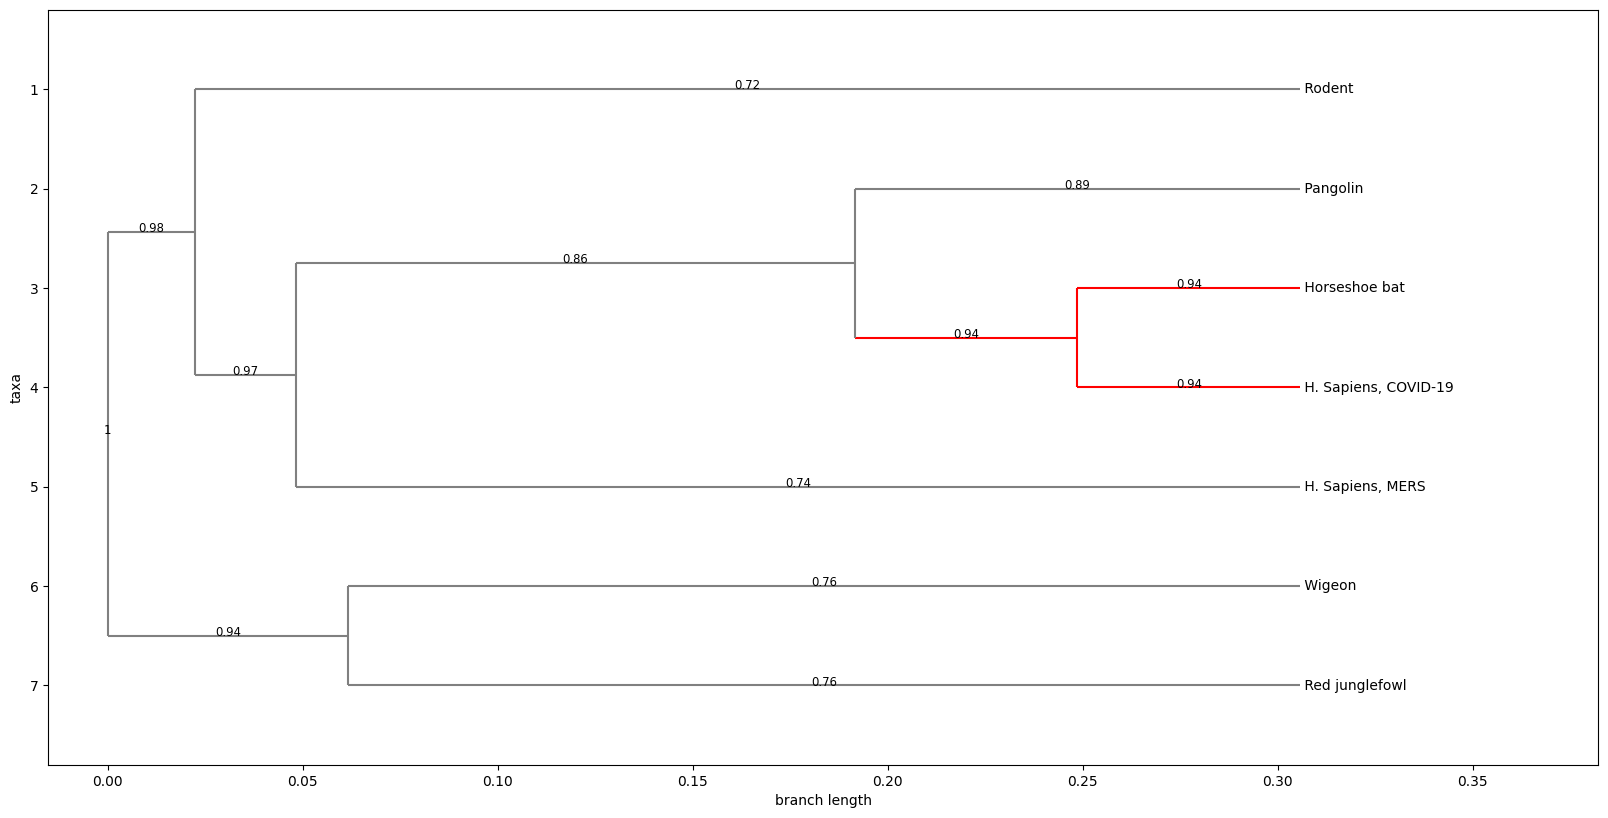

In [ ]:
fig = plt.figure(figsize=(20, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree_different_hosts, axes=axes, label_func=get_label_different_hosts, branch_labels=lambda c: round(1- c.branch_length, 2), do_show=False)
#plt.savefig("/content/drive/My Drive/Colab Notebooks/DSLS/week10/output/phylogenetic_tree_different_hosts.png")

# Clustering


In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [ ]:
def py_clustering(dist_mtx, k=2):

  # choose medoid 2 and 4 in your C1 and C2 because min(D) in their cluster
  initial_medoids  =  kmeans_plusplus_initializer(dist_mtx, k, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize(return_index=True)
  kmedoids_instance = kmedoids(dist_mtx, initial_medoids, data_type = 'distance_matrix')
  # Run cluster analysis and obtain results.
  kmedoids_instance.process()
  clusters = kmedoids_instance.get_clusters()
  medoids  = kmedoids_instance.get_medoids()
  
  return clusters,medoids

def hamming_dist(s1, s2):
    assert len(s1) == len(s2)
    hd = 0
    for b1, b2 in zip(s1, s2):
        if b1 != b2:
            hd += 1
    return hd


def get_hamm(MSA, mirror = True):
  n_seqs = len(MSA)
  dist_mtx = np.zeros((n_seqs,n_seqs))

  for IDseq1, IDseq2 in itertools.combinations(range(len(MSA)), 2):
    seq1_al = str(MSA[IDseq1].seq)
    seq2_al = str(MSA[IDseq2].seq)
    dist_mtx[IDseq1,IDseq2] = hamming_dist(seq1_al, seq2_al)
  #dist_mtx = normalize(dist_mtx, axis=1, norm='l1')
  return dist_mtx + dist_mtx.T if mirror else dist_mtx

In [ ]:
hamm_humans = get_hamm(alignment_human)

In [ ]:
c, m = py_clustering(hamm_humans, 6)
locations = np.array(metadata_human.location)
result_plots = []
for cluster in c:
  tmp = [locations[hit] for hit in cluster]
  result_plots.append(tmp)


[['China: Zhejiang', 'Germany', 'China: Hubei, Wuhan', 'Australia', 'USA: NY'],
 ['Uruguay'],
 ['Tunisia'],
 ['USA: Washington', 'USA: NY', 'USA: Washington'],
 ['Brazil', 'France'],
 ['Italy', 'Thailand']]

In [ ]:
locations

array(['Uruguay', 'Tunisia', 'Thailand', 'Italy', 'France', 'Germany',
       'China: Hubei, Wuhan', 'Brazil', 'China: Zhejiang', 'Australia',
       'USA: NY', 'USA: NY', 'USA: Washington', 'USA: Washington'],
      dtype=object)

PCA APPROACH


In [ ]:
plt.style.use('ggplot')
import seaborn as sns
from sklearn.decomposition import PCA
  
print(np.unique(alignment_human[0].seq))
data = [[char for char in str(ids.seq)] for ids in alignment_human]
df = pd.DataFrame(data)
change = {base:idx  for idx, base in enumerate(np.unique(df))}
df.replace(change,  inplace=True)
tranformed_df = PCA(n_components=2).fit_transform(df)



df = pd.DataFrame(tranformed_df, columns=["x", "y"])
print(df.head())
df["Country"] =  locations

df["Continent"] = ['SAM', 'AFR', 'ASI', 'EUR', 'EUR', 'EUR', 'ASI', 'SAM', 'ASI', 'AUS', 'NAM', 'NAM', 'NAM', 'NAM']

['-' 'A' 'C' 'G' 'N' 'T']
           x          y
0  26.196706  10.847549
1   8.086450   1.741596
2  -6.553500   4.393705
3  -6.614397   3.990253
4   5.596394  -9.465399


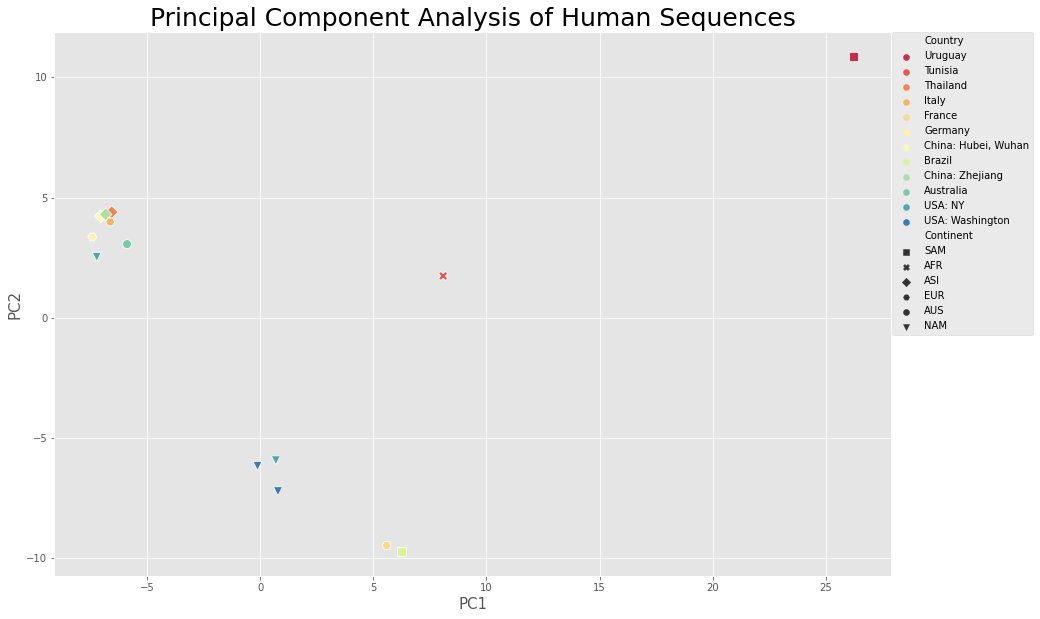

In [ ]:
markers = {"SAM": "s", "AFR": "X","ASI": "D", "EUR": "H","AUS": "o", "NAM": "v"}
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x='x',y='y',hue = 'Country',data = df,style='Continent',legend='full', s=80, palette='Spectral', markers=markers);
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
plt.title('Principal Component Analysis of Human Sequences', fontsize=25)
plt.legend(bbox_to_anchor=(1.001, 1), loc=2, borderaxespad=0.)
#ax = sns.scatterplot(x='x',y='y',hue = 'Country',data = df,legend='full', s=20, palette='Spectral');



In [ ]:
len(df.x)

14

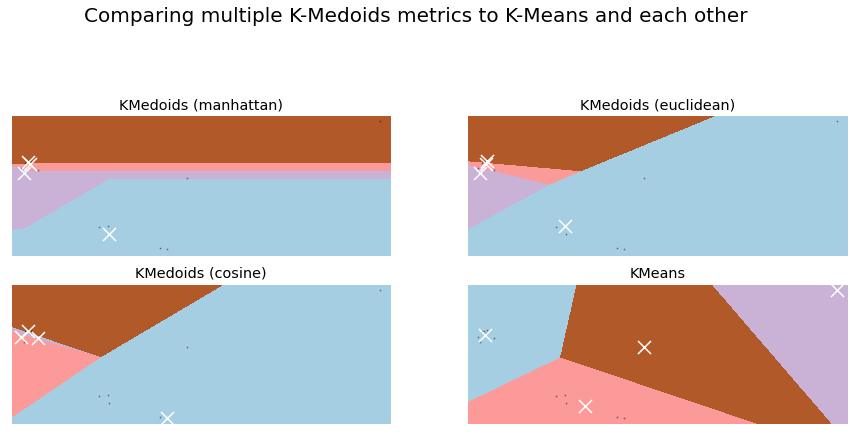

In [ ]:
reduced_data = np.zeros((len(df.x),2))
reduced_data[:,0] = df.x
reduced_data[:,1] =df.y

x_min, x_max = df.x.min() - 1, df.x.max() + 1
y_min, y_max = df.y.min() - 1, df.y.max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
n_digits = 4
plt.figure(figsize=(15,15))
plt.clf()

plt.suptitle(
    "Comparing multiple K-Medoids metrics to K-Means and each other",
    fontsize=20,
)


selected_models = [
    (
        KMedoids(metric="manhattan", n_clusters=n_digits),
        "KMedoids (manhattan)",
    ),
    (
        KMedoids(metric="euclidean", n_clusters=n_digits),
        "KMedoids (euclidean)",
    ),
    (KMedoids(metric="cosine", n_clusters=n_digits), "KMedoids (cosine)"),
    (KMeans(n_clusters=n_digits), "KMeans"),
]

plot_rows = int(np.ceil(len(selected_models) / 2.0))
plot_cols = 5

for i, (model, description) in enumerate(selected_models):

    # Obtain labels for each point in mesh. Use last trained model.
    model.fit(reduced_data)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(plot_cols, plot_rows, i + 1)
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(
        reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2, alpha=0.3)

    # Plot the centroids as a white X
    centroids = model.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(description)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

plt.show()